### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
tiendas = [tienda, tienda2, tienda3, tienda4]

In [4]:
numero_tienda = []
ingresos = []
for i, df in enumerate(tiendas, start=1):
  ingreso = round(df['Precio'].sum())
  numero_tienda.append(f"Tienda {i}")
  ingresos.append(ingreso)
  print(f"Ingreso total en la Tienda {i}: ${ingreso:,.2f}")

Ingreso total en la Tienda 1: $1,150,880,400.00
Ingreso total en la Tienda 2: $1,116,343,500.00
Ingreso total en la Tienda 3: $1,098,019,600.00
Ingreso total en la Tienda 4: $1,038,375,700.00


In [5]:
print(ingresos)
print(numero_tienda)

[1150880400, 1116343500, 1098019600, 1038375700]
['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


# 2. Ventas por categoría

In [43]:
def ventas_por_categoria(df , nombre_tienda):
  conteo = df['Categoría del Producto'].value_counts().reset_index()
  conteo.columns = ['Categoría', 'Ventas Totales']
  print(f"\n--- {nombre_tienda} ---")
  #print(conteo)
  return conteo



In [44]:
ventas_por_categoria(tienda, "Tienda 1")


--- Tienda 1 ---


,Categoría,Ventas Totales
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [47]:
ventas_por_categoria(tienda2, "Tienda 2")


--- Tienda 2 ---


,Categoría,Ventas Totales
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [46]:
ventas_por_categoria(tienda3, "Tienda 3")


--- Tienda 3 ---


,Categoría,Ventas Totales
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


In [48]:
ventas_por_categoria(tienda4, "Tienda 4")


--- Tienda 4 ---


,Categoría,Ventas Totales
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


# 3. Calificación promedio de la tienda


In [74]:
calificaciones = []
for i, df in enumerate(tiendas, start=1):
  calificacion = round(((df['Calificación'].sum())/len(df)),2)
  calificaciones.append(calificacion)
  print(f"Calificación promedio de la tienda {i}: {calificacion:.2f}")


Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.00


# 4. Productos más y menos vendidos

In [18]:
def analizar_tienda(df, nombre_tienda):
  ventas = df['Producto'].value_counts().reset_index()
  ventas.columns = ['Producto', 'Ventas Totales']

  top5_mas_vendidos = ventas.nlargest(5, 'Ventas Totales')
  top5_menos_vendidos = ventas.nsmallest(5, 'Ventas Totales')
  print(f"\n{'='*50}")
  print(f"RESULTADOS PARA: {nombre_tienda.upper()}")
  print(f"{'='*50}")

  print("\nTOP 5 PRODUCTOS MÁS VENDIDOS:")
  print(top5_mas_vendidos.to_string(index=False))

  print("\nTOP 5 PRODUCTOS MENOS VENDIDOS:")
  print(top5_menos_vendidos.to_string(index=False))

  productos_mas = top5_mas_vendidos['Producto'].tolist()
  ventas_mas = top5_mas_vendidos['Ventas Totales'].tolist()

  productos_menos = top5_menos_vendidos['Producto'].tolist()
  ventas_menos = top5_menos_vendidos['Ventas Totales'].tolist()


  return productos_mas, ventas_mas, productos_menos, ventas_menos





In [26]:
productos_mas_t1, ventas_mas_t1, productos_menos_t1, ventas_menos_t1 = analizar_tienda(tienda, 'Tienda 1')
productos_mas_t2, ventas_mas_t2, productos_menos_t2, ventas_menos_t2 = analizar_tienda(tienda2, 'Tienda 2')
productos_mas_t3, ventas_mas_t3, productos_menos_t3, ventas_menos_t3 = analizar_tienda(tienda3, 'Tienda 3')
productos_mas_t4, ventas_mas_t4, productos_menos_t4, ventas_menos_t4 = analizar_tienda(tienda4, 'Tienda 4')



RESULTADOS PARA: TIENDA 1

TOP 5 PRODUCTOS MÁS VENDIDOS:
        Producto  Ventas Totales
      Microondas              60
   TV LED UHD 4K              60
         Armario              60
Secadora de ropa              58
   Mesa de noche              56

TOP 5 PRODUCTOS MENOS VENDIDOS:
                 Producto  Ventas Totales
Auriculares con micrófono              33
             Celular ABXY              33
          Olla de presión              35
                Pandereta              36
                  Mochila              39

RESULTADOS PARA: TIENDA 2

TOP 5 PRODUCTOS MÁS VENDIDOS:
                 Producto  Ventas Totales
Iniciando en programación              65
               Microondas              62
                  Batería              61
        Guitarra acústica              58
                Pandereta              58

TOP 5 PRODUCTOS MENOS VENDIDOS:
       Producto  Ventas Totales
  Juego de mesa              32
Mesa de comedor              34
      Impresora     

# 5. Envío promedio por tienda

In [49]:
for i, df in enumerate(tiendas, start=1):
  costo_envio_promedio = (df['Costo de envío'].sum())/len(df)
  print(f"Costo de envio promedio en la Tienda {i}: ${costo_envio_promedio:,.2f}")

Costo de envio promedio en la Tienda 1: $26,018.61
Costo de envio promedio en la Tienda 2: $25,216.24
Costo de envio promedio en la Tienda 3: $24,805.68
Costo de envio promedio en la Tienda 4: $23,459.46


## 6. Graficos 1

In [13]:
import matplotlib.pyplot as plt
import numpy as np

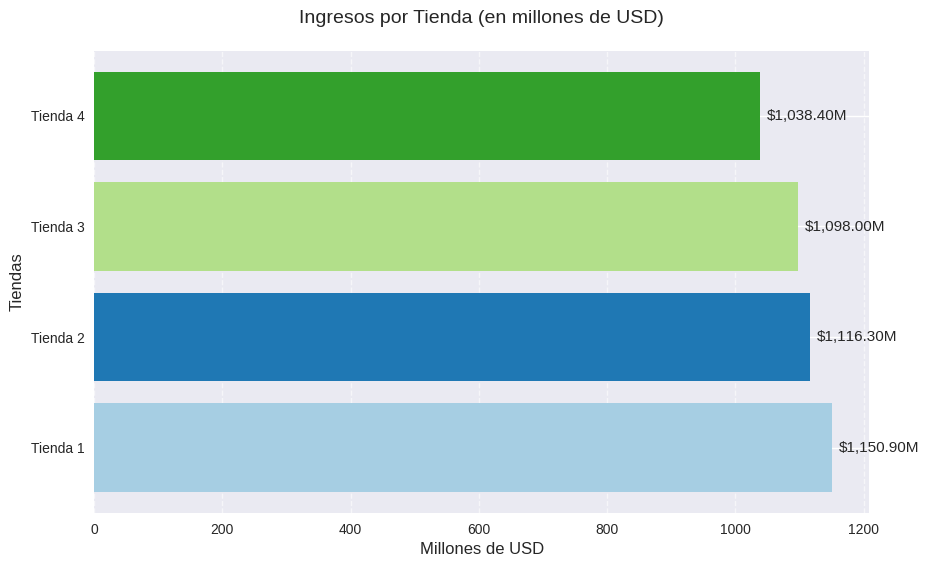

In [66]:
ingresos_millones = [x/1000000 for x in ingresos]
redondeo_ingreso_millones = [round(x, 1) for x in ingresos_millones]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

bars = plt.barh(numero_tienda, redondeo_ingreso_millones, color=plt.cm.Paired(np.arange(len(numero_tienda))))

plt.title('Ingresos por Tienda (en millones de USD)', fontsize=14, pad=20)
plt.xlabel('Millones de USD', fontsize=12)
plt.ylabel('Tiendas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10,  # Posición X (ancho de la barra + margen)
             bar.get_y() + bar.get_height()/2,  # Posición Y (centro de la barra)
             f'${width:,.2f}M',  # Texto con formato
             va='center', ha='left', fontsize=11)

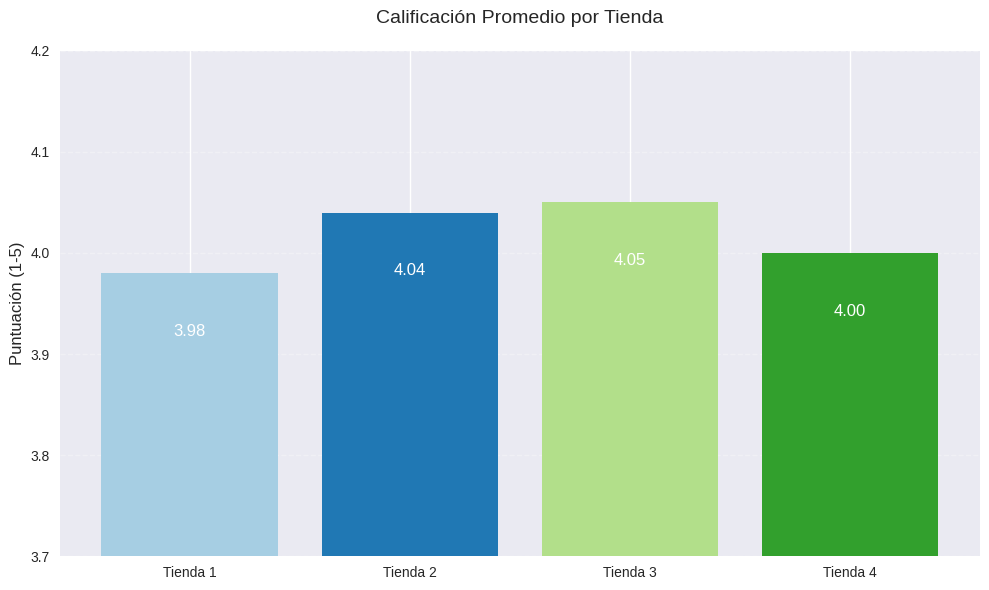

In [78]:
plt.figure(figsize=(10, 6))
bars = plt.bar(numero_tienda, calificaciones, color=['#A6CEE3', '#2078B4', '#B2DF8A', '#32A02D'])
plt.title('Calificación Promedio por Tienda', fontsize=14, pad=20)
plt.ylabel('Puntuación (1-5)', fontsize=12)
plt.ylim(3.7, 4.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-0.05,
             f'{height:.2f}',
             ha='center', va='top', color='white', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

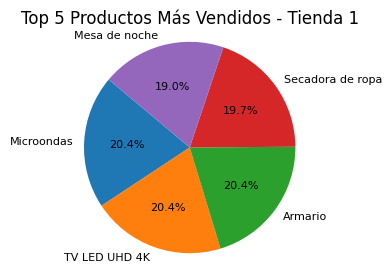

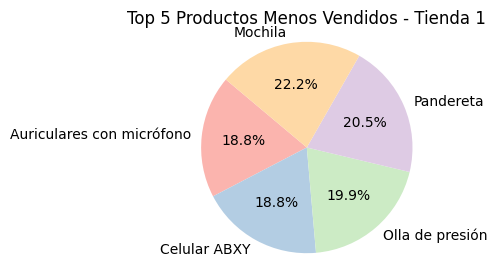

In [39]:
#####TIENDA 1############
#MAS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_mas_t1,
    labels=productos_mas_t1,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Top 5 Productos Más Vendidos - Tienda 1')
plt.axis('equal')
plt.show()
#MENOS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_menos_t1,
    labels=productos_menos_t1,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Productos Menos Vendidos - Tienda 1')
plt.axis('equal')
plt.show()






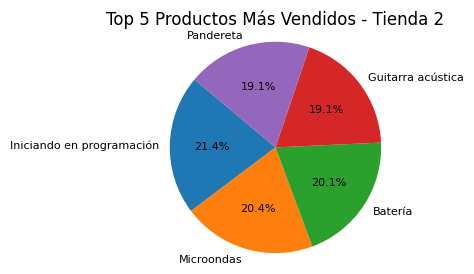

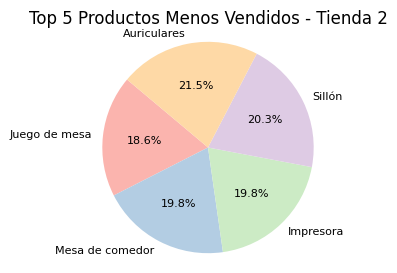

In [40]:
#######TIENDA 2###########
#MAS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_mas_t2,
    labels=productos_mas_t2,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Top 5 Productos Más Vendidos - Tienda 2')
plt.axis('equal')
plt.show()
#MENOS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_menos_t2,
    labels=productos_menos_t2,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8},
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Productos Menos Vendidos - Tienda 2')
plt.axis('equal')
plt.show()

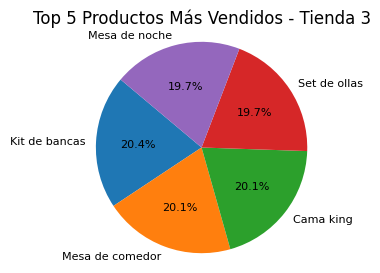

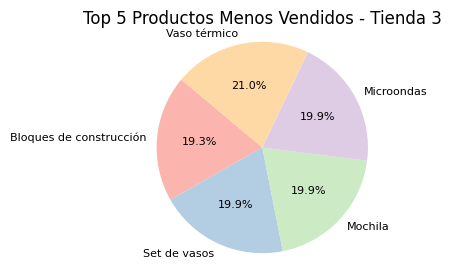

In [41]:
#######TIENDA 3###########
#MAS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_mas_t3,
    labels=productos_mas_t3,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Top 5 Productos Más Vendidos - Tienda 3')
plt.axis('equal')
plt.show()
#MENOS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_menos_t3,
    labels=productos_menos_t3,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8},
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Productos Menos Vendidos - Tienda 3')
plt.axis('equal')
plt.show()

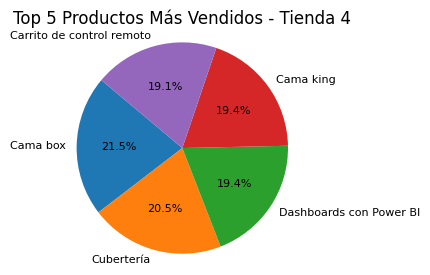

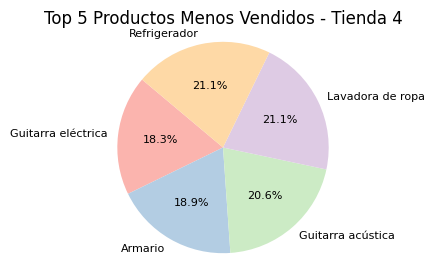

In [42]:
#######TIENDA 4###########
#MAS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_mas_t4,
    labels=productos_mas_t4,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Top 5 Productos Más Vendidos - Tienda 4')
plt.axis('equal')
plt.show()
#MENOS VENDIDOS#
plt.figure(figsize=(3,3))
plt.pie(
    ventas_menos_t4,
    labels=productos_menos_t4,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8},
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 Productos Menos Vendidos - Tienda 4')
plt.axis('equal')
plt.show()

# Informe Final: Análisis de Tiendas para Decisión de Venta

# Introducción
El propósito de este análisis es determinar cuál de las tiendas analizadas es la más adecuada para que el Sr. Juan establezca una nueva DECISION comercial. Para ello, se realizó un estudio completo de los datos disponibles de cada tienda, evaluando:

* Los ingresos totales.
* Las categorías de productos más y menos vendidas.
* Las calificaciones promedio otorgadas por los clientes.
* Los productos más y menos vendidos.
* El costo promedio de envío por tienda.

El objetivo es ofrecer una recomendación fundamentada en datos que optimice las probabilidades de éxito comercial para el Sr. Juan.

# Desarrollo
# 1. Ingresos Totales por Tienda

Analizamos los ingresos de cada tienda sumando el total de las ventas. Se observó que:

* Tienda 1 presentó ingresos de $1,150,880,400.00

* Tienda 2 presentó ingresos de $1,116,343,500.00

* Tienda 3 presentó ingresos de $1,098,019,600.00

* Tienda 4 presentó ingresos de $1,038,375,700.00

➡️ **Conclusión parcial**: La Tienda que genera menos ingresos es Tienda 4.



# 2. Categorías de Productos

| Ventas por categoria | Tienda 1 | Tienda 2| Tienda 3 | Tienda 4 |
|--------|---------------|------------|---------|----------------------|
| Muebles | 465 | 442 | 499 | 480 |
| Electrónicos | 448 | 422 | 451 | 451 |
| Juguetes | 324 | 313 |315 | 338 |
| Electrodomésticos | 312 | 305 | 278 | 254 |
| Deportes y diversión | 284 | 275 | 277| 277|
| Instrumentos musicales | 182 | 224 | 177 | 170 |
| Libros | 173 | 197 | 185 | 187 |
| Artículos para el hogar | 171 | 181 | 177 | 201 |

➡️ **Conclusión parcial**: la Tienda 2 es menos eficiente en cuanto a categorias

# 3. Calificación Promedio de Clientes

La satisfacción del cliente es clave. El promedio de calificaciones fue:
* Tienda 1: 3.98

* Tienda 2: 4.04

* Tienda 3: 4.05

* Tienda 4: 4.00

➡️ Conclusión parcial: La Tienda con menor satisfacción del cliente es Tienda 1.

# 4. Productos Más y Menos Vendidos
 Reflejamos los produsctos mas y menos cendidos por cada tienda y analizamos:
 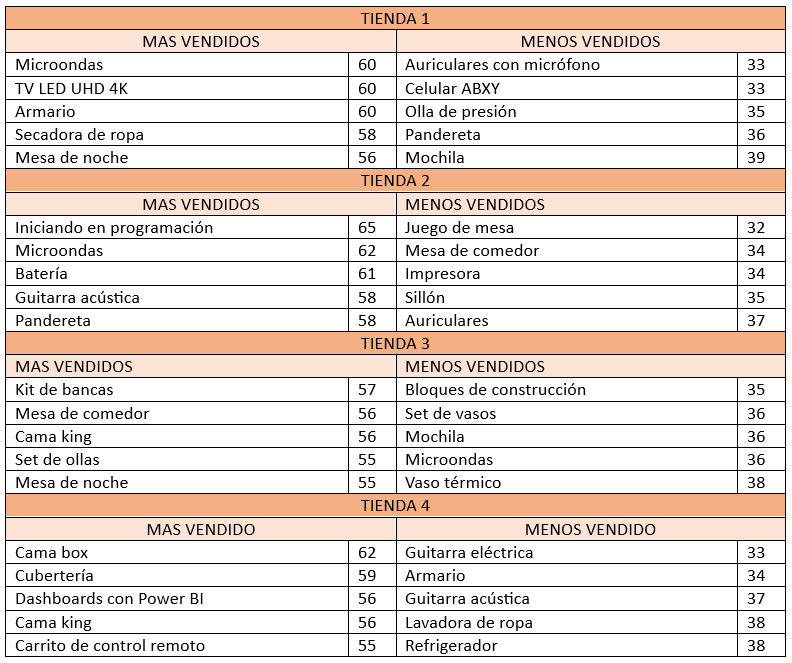

➡️ Conclusión parcial: Tienda 2 tiene buenas ventas en libros pero falla en vienes duraderos o grandes lo que indica un mal enfoque comercial

# 5. Costo de Envío Promedio

El costo de envío puede influir en la satisfacción y la conversión de clientes:

* Costo de envio promedio en la Tienda 1: $26,018.61

* Costo de envio promedio en la Tienda 2: $25,216.24

* Costo de envio promedio en la Tienda 3: $24,805.68

* Costo de envio promedio en la Tienda 4: $23,459.46

➡️ Conclusión parcial: La Tienda 1 tienes un mayor costo de envio por lo tanto tiene una mayor tasa de perdida de clientes

# ✅ Conclusión
Aunque **Tienda 2** supera por poco a Tienda 3 y Tienda 4 en ingresos brutos, su:

Baja calidad de ventas,

Alto costo de operación,

Desempeño débil en productos clave,

Y menor rentabilidad por categoría,

...la convierten en la tienda menos eficiente globalmente.